In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Preprocessing
## Load the input data

In [2]:
dir_data = './3rd-ml100marathon-midterm/'
print(os.listdir(dir_data))
data_path = '3rd-ml100marathon-midterm/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')
train_Y = df_train['poi']
train_Y.astype(float)         #convert Boolean to 0 and 1
ids = df_test['name']
df_train = df_train.drop(['name', 'poi'] , axis=1)
df_test = df_test.drop(['name'] , axis=1)
df = pd.concat([df_train,df_test])
print(df.shape)
df.head()

['test_features.csv', 'train_data.csv', 'enron61702insiderpay.pdf', 'sample_submission.csv']
(146, 20)


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [3]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


## Handle the missing value, outlier, and object feature

In [4]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(20))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [5]:
# 信箱缺值補 'None'
df['email_address'] = df['email_address'].fillna("None")

# 部分缺值補平均值
mean_cols = ['total_payments','total_stock_value','director_fees','long_term_incentive',
             'bonus','other','expenses','salary','exercised_stock_options']
for col in mean_cols:
    df[col] = df[col].fillna(df[col].mean())

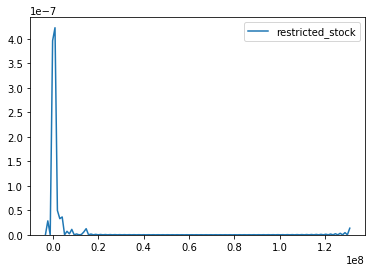

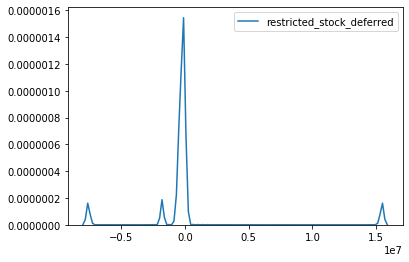

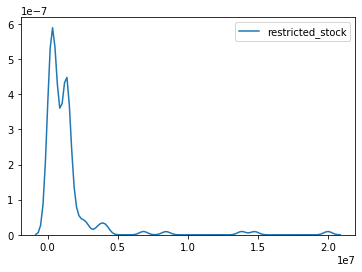

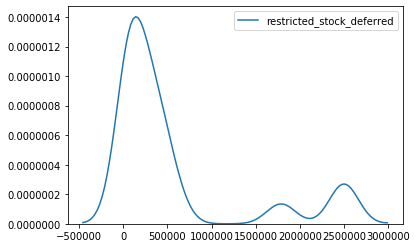

In [6]:
# restricted_stock and restricted_stock_deferred
sns.kdeplot(df['restricted_stock'])
plt.show()
sns.kdeplot(df['restricted_stock_deferred'])
plt.show()
# check whether negative numbers are outlier or not
# print(df[df['restricted_stock']<0]['restricted_stock'])
# print(df[df['restricted_stock_deferred']<0]['restricted_stock_deferred'])
# using abs to modified
df['restricted_stock'] = abs(df['restricted_stock'])
df['restricted_stock_deferred'] = abs(df['restricted_stock_deferred'])
# modify outlier
df['restricted_stock'] = df['restricted_stock'].clip(0, 0.2*(10**8))
df['restricted_stock_deferred'] = df['restricted_stock_deferred'].clip(0, 0.25*(10**7))
# restricted_stock: fill na with mean value
df['restricted_stock'] = df['restricted_stock'].fillna(df['restricted_stock'].mean())
sns.kdeplot(df['restricted_stock'])
plt.show()
sns.kdeplot(df['restricted_stock_deferred'])
plt.show()

In [7]:
# 部分欄位缺值補眾數
mode_cols = ['from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'shared_receipt_with_poi']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
# deferral payment outliers and missing values
print(df['deferral_payments'].describe())
#Ignore NA, 計算五值
five_num = [0, 25, 50, 75, 100]
#print(df['deferral_payments'].isnull()) 布林值array 判斷是否有nan值
#print(~df['deferral_payments'].isnull())
quantile_5s = [np.percentile(df[~df['deferral_payments'].isnull()]['deferral_payments'], q = i) for i in five_num]
print(quantile_5s)

count    3.900000e+01
mean     1.642674e+06
std      5.161930e+06
min     -1.025000e+05
25%      8.157300e+04
50%      2.274490e+05
75%      1.002672e+06
max      3.208340e+07
Name: deferral_payments, dtype: float64
[-102500.0, 81573.0, 227449.0, 1002671.5, 32083396.0]


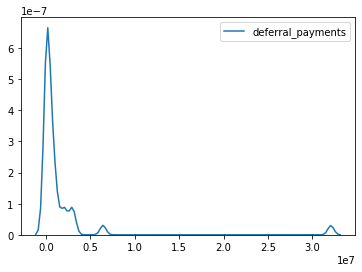

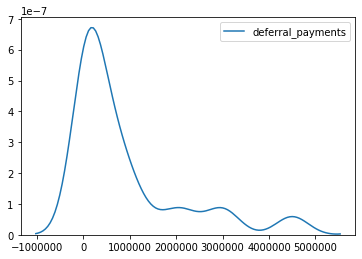

In [9]:
#outlier detection
sns.kdeplot(df['deferral_payments'])
plt.show()
df['deferral_payments'].value_counts(ascending=False)
# we can observe that there's only one negative in the data, using abs to be all positive
# print(df[df['deferral_payments']<0]['deferral_payments'])
df['deferral_payments'] = abs(df['deferral_payments'])
# we can obviously find that the maximum is likely to be outlier
# 將 deferral_payments 限制在 800 到 2500 以內, 調整離群值
df['deferral_payments'] = df['deferral_payments'].clip(0, 0.45*(10**7))
sns.kdeplot(df['deferral_payments'])
plt.show()

In [10]:
# 部分欄位缺值補中位數
median_cols = ['loan_advances','restricted_stock_deferred','deferred_income','deferral_payments',
             'restricted_stock']
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
# email 的 特徵工程 : email address取前面帳號名做特掙雜湊(feature hash)
df_email = [i.split("@")[0].split(".")[0].strip() for i in df["email_address"]]
df["email_name"] = pd.Series(df_email)
df['email_name'] = df["email_name"].map(lambda x:hash(x) % 10)
df["email_name"] = df["email_name"].astype(int)
# 捨棄 email_address欄位
df.drop(labels = ["email_address"], axis = 1, inplace = True)

In [12]:
# 做完各種補缺值, 確認一下有沒有遺漏
na_check(df)
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

,Missing Ratio


## **Feature Scaling and Feature Selection**

Text(0.5, 1, 'Correlation Heatmap')

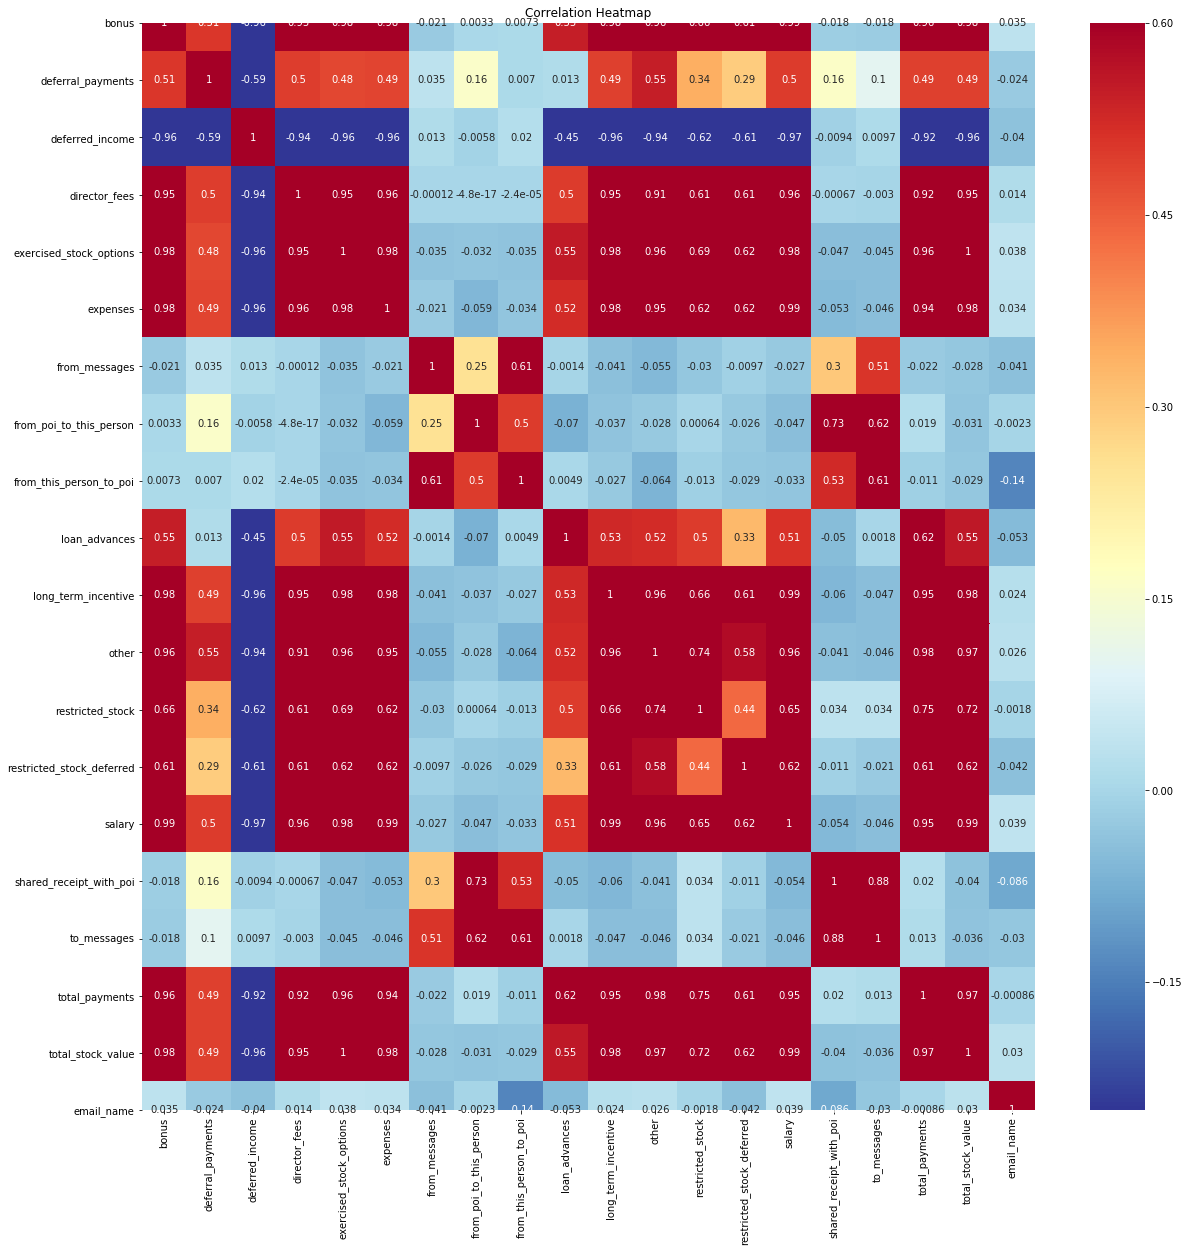

In [13]:
# 繪製相關係數 (correlations) 的 Heatmap
df_corrs = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(df_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
#std = StandardScaler()
#train_X_std = std.fit_transform(train_X)
#test_X_std = std.fit_transform(test_X)
#mms = MinMaxScaler()
#train_X_mms = mms.fit_transform(train_X)
#test_X_mms = mms.fit_transform(test_X)
norm = Normalizer()
train_X_norm = norm.fit_transform(train_X)
test_X_norm = norm.fit_transform(test_X)

In [15]:
# Feature Selection
# 隨機森林擬合後, 將結果依照重要性由高到低排序
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
estimator.fit(train_X_norm, train_Y)
# estimator.feature_importances_ 就是模型的特徵重要性, 這邊先與欄位名稱結合起來, 才能看到重要性與欄位名稱的對照表
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

loan_advances                0.170361
director_fees                0.094220
total_stock_value            0.083559
deferred_income              0.073929
deferral_payments            0.067695
exercised_stock_options      0.057375
bonus                        0.056059
other                        0.055989
from_messages                0.049705
expenses                     0.045483
long_term_incentive          0.039901
restricted_stock             0.036648
shared_receipt_with_poi      0.034162
restricted_stock_deferred    0.031913
from_this_person_to_poi      0.024037
total_payments               0.022841
from_poi_to_this_person      0.021163
to_messages                  0.017850
salary                       0.017111
email_name                   0.000000
dtype: float64

# Modelling
## Choosing the classification algorithm with the best performance 

In [16]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((84, 20), (29, 20), (84,), (29,))

In [17]:
# Run without any feature preprocessing first
from sklearn.metrics import accuracy_score, roc_auc_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train.values.ravel())
logreg_predicted = logreg.predict(x_test)
print('Logistic Regression:',accuracy_score(y_test, logreg_predicted))

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train.values.ravel())
dtree_predicted = dtree.predict(x_test)
print('Decision Tree:',accuracy_score(y_test, dtree_predicted))

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train.values.ravel())
rfc_predicted = rfc.predict(x_test)
print('Random Forest:',accuracy_score(y_test,rfc_predicted))

# Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(x_train,y_train.values.ravel())
gbm_predicted = gbm.predict(x_test)
print('gbm:',accuracy_score(y_test,gbm_predicted))

# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train.values.ravel())
xgb_predicted = xgb.predict(x_test)
print('XGBoost:',accuracy_score(y_test, xgb_predicted))

# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train.values.ravel())
svc_predicted = svc_model.predict(x_test)
print('SVM:',accuracy_score(y_test, svc_predicted))

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train.values.ravel())
knn_predicted= knn.predict(x_test)
print('KNN:',accuracy_score(y_test, knn_predicted))

Logistic Regression: 0.7931034482758621
Decision Tree: 0.7931034482758621
Random Forest: 0.8275862068965517
gbm: 0.8275862068965517
XGBoost: 0.8620689655172413
SVM: 0.8275862068965517
KNN: 0.8620689655172413


In [18]:
# Run again with feature scaling
from sklearn.model_selection import cross_val_score
# KNN with norm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
print('KNN with norm:',cross_val_score(knn_model, train_X_norm, train_Y, cv=10).mean())

# SVM with norm
from sklearn.svm import SVC
svc_model = SVC()
print('SVM with norm:',cross_val_score(svc_model, train_X_norm, train_Y, cv=10).mean())

# GBM with norm
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()
print('GBM with norm:',cross_val_score(gbm_model, train_X_norm, train_Y, cv=10).mean())

# XGBoost with norm
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
print('XGBoost with norm:',cross_val_score(xgb_model, train_X_norm, train_Y, cv=10).mean())

# Logistic Regression with norm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print('Logistic Regression with norm:',cross_val_score(logreg, train_X_norm, train_Y, cv=10).mean())

# Decision Tree with norm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
print('Decision Tree with norm:',cross_val_score(dtree, train_X_norm, train_Y, cv=10).mean())

# Random Forest with norm
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
print('Random Forest with norm:',cross_val_score(rfc, train_X_norm, train_Y, cv=10).mean())

KNN with norm: 0.8689393939393939
SVM with norm: 0.8863636363636364
GBM with norm: 0.8507575757575758
XGBoost with norm: 0.903030303030303
Logistic Regression with norm: 0.8863636363636364
Decision Tree with norm: 0.8318181818181818
Random Forest with norm: 0.8946969696969695


In [19]:
# Run again random forest with feature selection
estimator=rfc
# 原始特徵 + 隨機森林
print('original feature:',cross_val_score(estimator, train_X_norm, train_Y, cv=5).mean())
# 高重要性特徵 + 隨機森林 (top 10 features)
high_feature = list(feats[:10].index)
train_X_filter = norm.fit_transform(train_X[high_feature])
print('filtered feature:',cross_val_score(estimator, train_X_filter, train_Y, cv=5).mean())

original feature: 0.9023715415019762
filtered feature: 0.8932806324110671


## Hyper-parameter tuning
### Applying Random Search to improve the accuracy

In [20]:
from sklearn.model_selection import KFold, RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,3,5]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


**1. Random Forest**

In [21]:
# # Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_search_rf = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
random_result = random_search_rf.fit(train_X_norm, train_Y)

# 使用最佳參數重新建立模型
rf_best = random_search_rf.best_estimator_
print('RF Best Score', random_search_rf.best_score_)
print('RF Best Params',random_search_rf.best_params_)
print('RF Accuracy',cross_val_score(rf_best,train_X_norm, train_Y, cv=10).mean())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RF Best Score 0.9026548672566371
RF Best Params {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
RF Accuracy 0.8939393939393938


**2. XGBoost**

In [22]:
print('XGBoost_parameters:',xgb_model.get_params)
learning_rate = [0.3,0.1,0.03,0.01]
gamma = [0,2,4]
max_depth = [3, 6, 10, 20]
min_child_weight = [0,1,5,10]
param_grid = dict(learning_rate=learning_rate,gamma=gamma,max_depth=max_depth,min_child_weight=min_child_weight)
print(param_grid)

XGBoost_parameters: <bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>
{'learning_rate': [0.3, 0.1, 0.03, 0.01], 'gamma': [0, 2, 4], 'max_depth': [3, 6, 10, 20], 'min_child_weight': [0, 1, 5, 10]}


In [23]:
random_search_xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
random_result_xgb = random_search_xgb.fit(train_X_norm, train_Y)
xgb_best = random_search_xgb.best_estimator_
print('XGB Best Score',random_search_xgb.best_score_)
print('XGB Best Params',random_search_xgb.best_params_)
print('XGB Accuracy',cross_val_score(xgb_best,train_X_norm, train_Y, cv=10).mean())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGB Best Score 0.9026548672566371
XGB Best Params {'min_child_weight': 0, 'max_depth': 20, 'learning_rate': 0.3, 'gamma': 0}
XGB Accuracy 0.8757575757575757


**3. Logistic Regression**

In [24]:
print('lr_parameters:',logreg.get_params)
penalty = ['l1', 'l2']
C=[1,10,100]
hyperparameters = dict(C=C, penalty=penalty)
print(hyperparameters)

lr_parameters: <bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>
{'C': [1, 10, 100], 'penalty': ['l1', 'l2']}


In [25]:
random_search_lr = RandomizedSearchCV(estimator = logreg, param_distributions = hyperparameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
random_result_lr = random_search_lr.fit(train_X_norm, train_Y)
lr_best = random_search_lr.best_estimator_
print('LR Best Score',random_search_lr.best_score_)
print('LR Best Params',random_search_lr.best_params_)
print('LR Accuracy',cross_val_score(lr_best,train_X_norm, train_Y, cv=10).mean())

Fitting 3 folds for each of 6 candidates, totalling 18 fits
LR Best Score 0.9026548672566371
LR Best Params {'penalty': 'l2', 'C': 100}
LR Accuracy 0.8856060606060605


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
#邏輯斯迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
test_X_filter = norm.fit_transform(test_X[high_feature])
lr_best.fit(train_X_filter, train_Y)
logreg_pred = lr_best.predict_proba(test_X_filter)[:,1]
sub = pd.DataFrame({'Name': ids, 'poi': logreg_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('Enron_Fraud_lr.csv', index=False) 

In [31]:
#XGBoost預測檔
xgb_best.fit(train_X_filter, train_Y)
xgb_pred = xgb_best.predict_proba(test_X_filter)[:,1]
sub = pd.DataFrame({'Name': ids, 'poi': xgb_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('Enron_Fraud_xgb.csv', index=False) 

In [32]:
# 隨機森林預測檔
rf_best.fit(train_X_filter, train_Y)
rfc_pred = rf_best.predict_proba(test_X_filter)[:,1]
sub = pd.DataFrame({'Name': ids, 'poi': rfc_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('Enron_Fraud_rfc.csv', index=False)

In [33]:
from mlxtend.classifier import StackingCVClassifier
stacking = StackingCVClassifier(classifiers=[lr_best, xgb_best, rf_best],  meta_classifier=rf_best, 
                                           use_probas=True, cv=5)
stacking.fit(train_X_filter, train_Y)
stacking_pred = stacking.predict(test_X_filter)
sub = pd.DataFrame({'Name': ids, 'poi': stacking_pred})
sub.to_csv('Enron_Frau_stacking.csv', index=False)